In [1]:
pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import findspark
findspark.init()

In [2]:
import pyspark

In [4]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Ejer').getOrCreate()
%time

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
df1 = spark.read.option("header","true").csv("C:/Users/ofeliafabiola.galvan/Documents/FGITHU/datasetproyecto-las-tres-partes/Course_info.csv")

In [7]:
#Equivalente al .shape  que muestra e
df1.count()
%time df1.count()

CPU times: total: 0 ns
Wall time: 799 ms


209734

In [8]:
#Equivalente a .info en pandas para ver el tipo de datos que contiene el dataset
df1.describe()
%time df1.describe()

CPU times: total: 46.9 ms
Wall time: 34.6 s


DataFrame[summary: string, id: string, title: string, is_paid: string, price: string, headline: string, num_subscribers: string, avg_rating: string, num_reviews: string, num_comments: string, num_lectures: string, content_length_min: string, published_time: string, last_update_date: string, category: string, subcategory: string, topic: string, language: string, course_url: string, instructor_name: string, instructor_url: string]

In [8]:
#Equivalente a .info en este caso para ver el tipo de datos en formato parecido al que da .info
df1.printSchema()
%time df1.printSchema

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_reviews: string (nullable = true)
 |-- num_comments: string (nullable = true)
 |-- num_lectures: string (nullable = true)
 |-- content_length_min: string (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)

CPU times: total: 0 ns
Wall time: 0 ns


<bound method DataFrame.printSchema of DataFrame[id: string, title: string, is_paid: string, price: string, headline: string, num_subscribers: string, avg_rating: string, num_reviews: string, num_comments: string, num_lectures: string, content_length_min: string, published_time: string, last_update_date: string, category: string, subcategory: string, topic: string, language: string, course_url: string, instructor_name: string, instructor_url: string]>

In [9]:
#Equivalente a .head o .tail, solo que aqui se especifica la cantidad que columnas que queremos que nos muestre el show se usa para ver 
#los datos
df1.show(5)
%time df1.show(5)

+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+-------------------+-------------+--------+--------------------+---------------+------------------+
|    id|               title|is_paid| price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date| category|        subcategory|        topic|language|          course_url|instructor_name|    instructor_url|
+------+--------------------+-------+------+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+---------+-------------------+-------------+--------+--------------------+---------------+------------------+
|4715.0|Online Vegan Vege...|   True| 24.99|Learn to cook del...|         2231.0|      3.75|      134.0|     

In [11]:
#equivalente al .describe de pandas python
df1.describe().show()
%time df1.describe().show()


+-------+------------------+-------------------------------+--------------------+------------------+------------------------+--------------------+--------------------+------------------+--------------------+-------------------+------------------+------------------+-----------------+--------------------+------------------+------------------+--------------------+--------------------+-------------------+------------------------+
|summary|                id|                          title|             is_paid|             price|                headline|     num_subscribers|          avg_rating|       num_reviews|        num_comments|       num_lectures|content_length_min|    published_time| last_update_date|            category|       subcategory|             topic|            language|          course_url|    instructor_name|          instructor_url|
+-------+------------------+-------------------------------+--------------------+------------------+------------------------+---------------

In [10]:
#Equivalente a seleccionar solo columnas o filas
#Equivalente a  colum_name_new= data_frame['name_Column']
#colum_name_new y lo puedo restringir a que me muestre un numero finito o el total de todo el dataset
df1.select('id', 'price').show(5)
%time df1.select('id', 'price').show(5)


+------+------+
|    id| price|
+------+------+
|4715.0| 24.99|
|1769.0|   0.0|
|5664.0| 19.99|
|7723.0|199.99|
|8157.0|159.99|
+------+------+
only showing top 5 rows

+------+------+
|    id| price|
+------+------+
|4715.0| 24.99|
|1769.0|   0.0|
|5664.0| 19.99|
|7723.0|199.99|
|8157.0|159.99|
+------+------+
only showing top 5 rows

CPU times: total: 0 ns
Wall time: 149 ms


In [11]:
df1.filter(df1.id > 9000).count()
%time df1.filter(df1.id>9000).count()

CPU times: total: 0 ns
Wall time: 1 s


209707

In [19]:
#Equivalente a funciones anidadas en pandas
from pyspark.sql import functions as F
df2 = df1.filter((F.col('price') == 0) & (F.col('category') == 
'Development') & (F.col('topic') =='Python') & (F.col('language') == 
'English') & (F.col('num_lectures') > 50) | (F.col('num_subscribers') > 6000000))
df2.count()
df2.show()
%time df2

+---------+--------------------+-------+-----+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+-----------+--------------------+------+--------+--------------------+--------------------+--------------------+
|       id|               title|is_paid|price|            headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|      published_time|last_update_date|   category|         subcategory| topic|language|          course_url|     instructor_name|      instructor_url|
+---------+--------------------+-------+-----+--------------------+---------------+----------+-----------+------------+------------+------------------+--------------------+----------------+-----------+--------------------+------+--------+--------------------+--------------------+--------------------+
| 433798.0|Introduction To P...|  False|  0.0|A Quick and Easy ...|       783638.0|  4.437906|

DataFrame[id: string, title: string, is_paid: string, price: string, headline: string, num_subscribers: string, avg_rating: string, num_reviews: string, num_comments: string, num_lectures: string, content_length_min: string, published_time: string, last_update_date: string, category: string, subcategory: string, topic: string, language: string, course_url: string, instructor_name: string, instructor_url: string]

In [12]:
#Filtremos lo mas que podamos de forma que obtengamos una sola fila con todas 
#las columnas y que sea el equivalente en pandas
from pyspark.sql import functions as F
df2 = df1.filter((F.col('price') == 0) & (F.col('category') == 
'Development') & (F.col('topic') =='Python') & (F.col('language') == 
'English') & (F.col('num_lectures') > 50) & (F.col('num_subscribers') > 6000000))
df2.count()
df2.show()
%time df2

+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
| id|title|is_paid|price|headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|published_time|last_update_date|category|subcategory|topic|language|course_url|instructor_name|instructor_url|
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+

CPU times: total: 0 ns
Wall time: 0 ns


DataFrame[id: string, title: string, is_paid: string, price: string, headline: string, num_subscribers: string, avg_rating: string, num_reviews: string, num_comments: string, num_lectures: string, content_length_min: string, published_time: string, last_update_date: string, category: string, subcategory: string, topic: string, language: string, course_url: string, instructor_name: string, instructor_url: string]

C:\Users\ofeliafabiola.galvan\Anaconda3\envs\Proyecto2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48292 (\N{HANGUL SYLLABLE BEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ofeliafabiola.galvan\Anaconda3\envs\Proyecto2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ofeliafabiola.galvan\Anaconda3\envs\Proyecto2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52880 (\N{HANGUL SYLLABLE KAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ofeliafabiola.galvan\Anaconda3\envs\Proyecto2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ofeliafabiola.galvan\Anaconda3\envs\Proyecto2\lib\site-packages\IPython\core\pylabtools.py:1

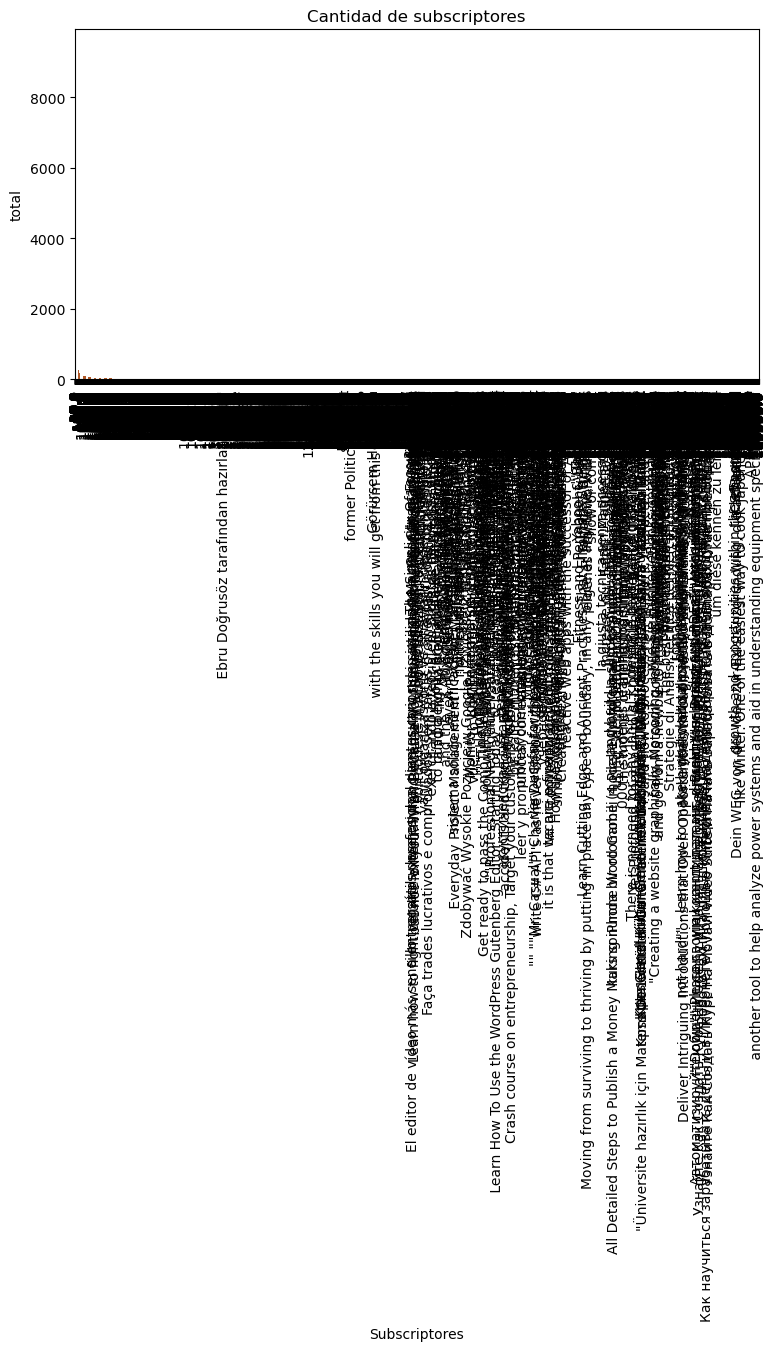

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import Row

archivo = df1.toPandas()
spark.stop()
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
paired_colors = plt.cm.Paired(range(len(archivo)))

archivo.num_subscribers.value_counts().plot(kind='bar',color=paired_colors)
plt.title('Cantidad de subscriptores')
plt.xlabel('Subscriptores')
plt.ylabel("total")
plt.show()

#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#lista = [(1,'100'),(2,'1000'),(3,'2000'),(4,'50000')]
#rdd = sparksession.parallelize (lista)
#people = rdd.map(lambda x: Row(id=int(x[0]), name=x[1]))
#schemaPeople = spark.create.DataFrame(people)
#df3 = df3.toPandas()
#df3.set_index('Grafica2').plot()
#plt.show()
